# Figure 1

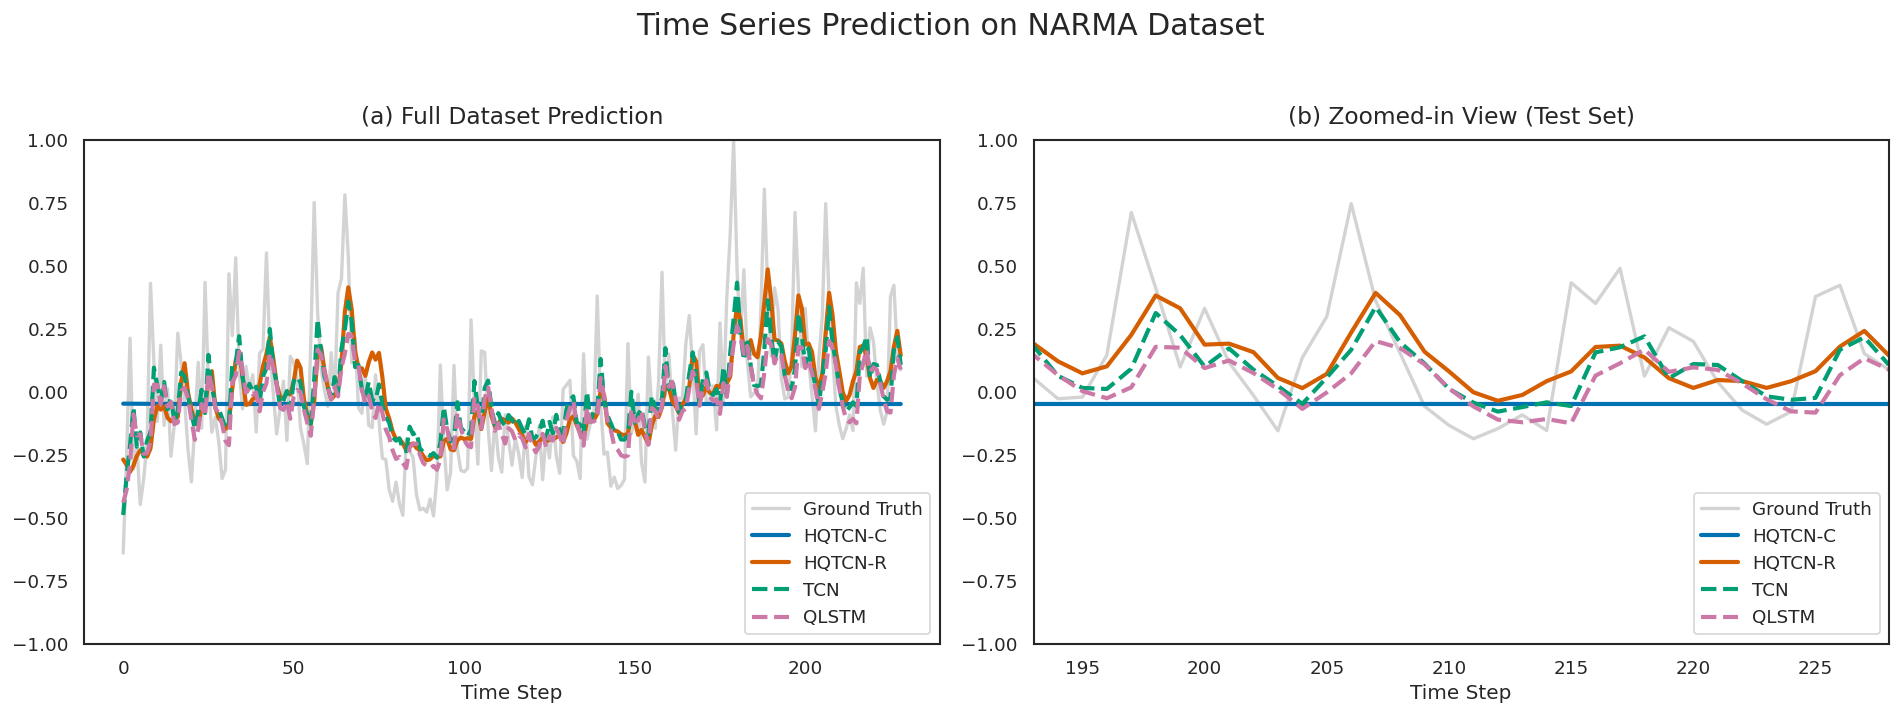

Figure saved successfully to: /pscratch/sd/p/pakmasha/QTCN/visualization/figure_1.svg


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Configuration ---
CSV_FILE_PATH = '/pscratch/sd/p/pakmasha/QTCN/visualization/narma_predictions.csv'
# Define the output path and filename
SAVE_DIR = '/pscratch/sd/p/pakmasha/QTCN/visualization'
FIGURE_NAME = 'figure_1.svg' # Using SVG for highest quality
SAVE_PATH = os.path.join(SAVE_DIR, FIGURE_NAME)

# Define the same color palette as Figure 2 for consistency
colors = {
    'ground_truth': '#D3D3D3', # Black
    'qtcn1': '#0072B2',      # Blue
    'qtcn2': '#D55E00',      # Vermillion
    'tcn': '#009E73',       # Green
    'qlstm': '#CC79A7',     # Reddish Purple
}

# --- NEW: Define the time range for the zoomed-in plot ---
ZOOM_START = 193
ZOOM_END = 228

# --- 2. Data Loading ---
try:
    df = pd.read_csv(CSV_FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file '{CSV_FILE_PATH}' was not found.")
    print("Please make sure the CSV file is in the correct location.")
    exit()

# --- 3. Plotting ---
sns.set_theme(style="white")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=120)

# --- NEW: Updated title and position ---
fig.suptitle('Time Series Prediction on NARMA Dataset', fontsize=18, y=0.99)

# --- Panel (a): Full Dataset Prediction ---
# --- NEW: Updated line widths ---
ax1.plot(df['time_index'], df['ground_truth'], label='Ground Truth', color=colors['ground_truth'], linewidth=2.0)
ax1.plot(df['time_index'], df['qtcn1_pred'], label='HQTCN-C', color=colors['qtcn1'], linewidth=2.5)
ax1.plot(df['time_index'], df['qtcn2_pred'], label='HQTCN-R', color=colors['qtcn2'], linewidth=2.5)
ax1.plot(df['time_index'], df['tcn_pred'], label='TCN', color=colors['tcn'], linewidth=2.5, linestyle='--')
ax1.plot(df['time_index'], df['qlstm_pred'], label='QLSTM', color=colors['qlstm'], linewidth=2.5, linestyle='--')

# --- NEW: Updated panel title and legend position ---
ax1.set_title('(a) Full Dataset Prediction', fontsize=14, pad=10)
ax1.set_xlabel('Time Step', fontsize=12)
# ax1.set_ylabel('Value', fontsize=12)
ax1.legend(loc='lower right')
ax1.set_ylim(-1.0, 1.0)

# --- Panel (b): Zoomed-in View ---
# --- NEW: Updated line widths ---
ax2.plot(df['time_index'], df['ground_truth'], label='Ground Truth', color=colors['ground_truth'], linewidth=2.0)
ax2.plot(df['time_index'], df['qtcn1_pred'], label='HQTCN-C', color=colors['qtcn1'], linewidth=2.5)
ax2.plot(df['time_index'], df['qtcn2_pred'], label='HQTCN-R', color=colors['qtcn2'], linewidth=2.5)
ax2.plot(df['time_index'], df['tcn_pred'], label='TCN', color=colors['tcn'], linewidth=2.5, linestyle='--')
ax2.plot(df['time_index'], df['qlstm_pred'], label='QLSTM', color=colors['qlstm'], linewidth=2.5, linestyle='--')

# --- NEW: Updated panel title, zoom range, and legend position ---
ax2.set_title('(b) Zoomed-in View (Test Set)', fontsize=14, pad=10)
ax2.set_xlabel('Time Step', fontsize=12)
# ax2.set_ylabel('Value', fontsize=12)
ax2.legend(loc='lower right')
ax2.set_xlim(ZOOM_START, ZOOM_END) # Apply the new zoom
ax2.set_ylim(-1.0, 1.0)

# --- 4. Final Touches and Saving ---
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Ensure the save directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

# Save the figure in high quality
plt.savefig(SAVE_PATH, bbox_inches='tight')

plt.show()

print(f"Figure saved successfully to: {SAVE_PATH}")

# Figure 2

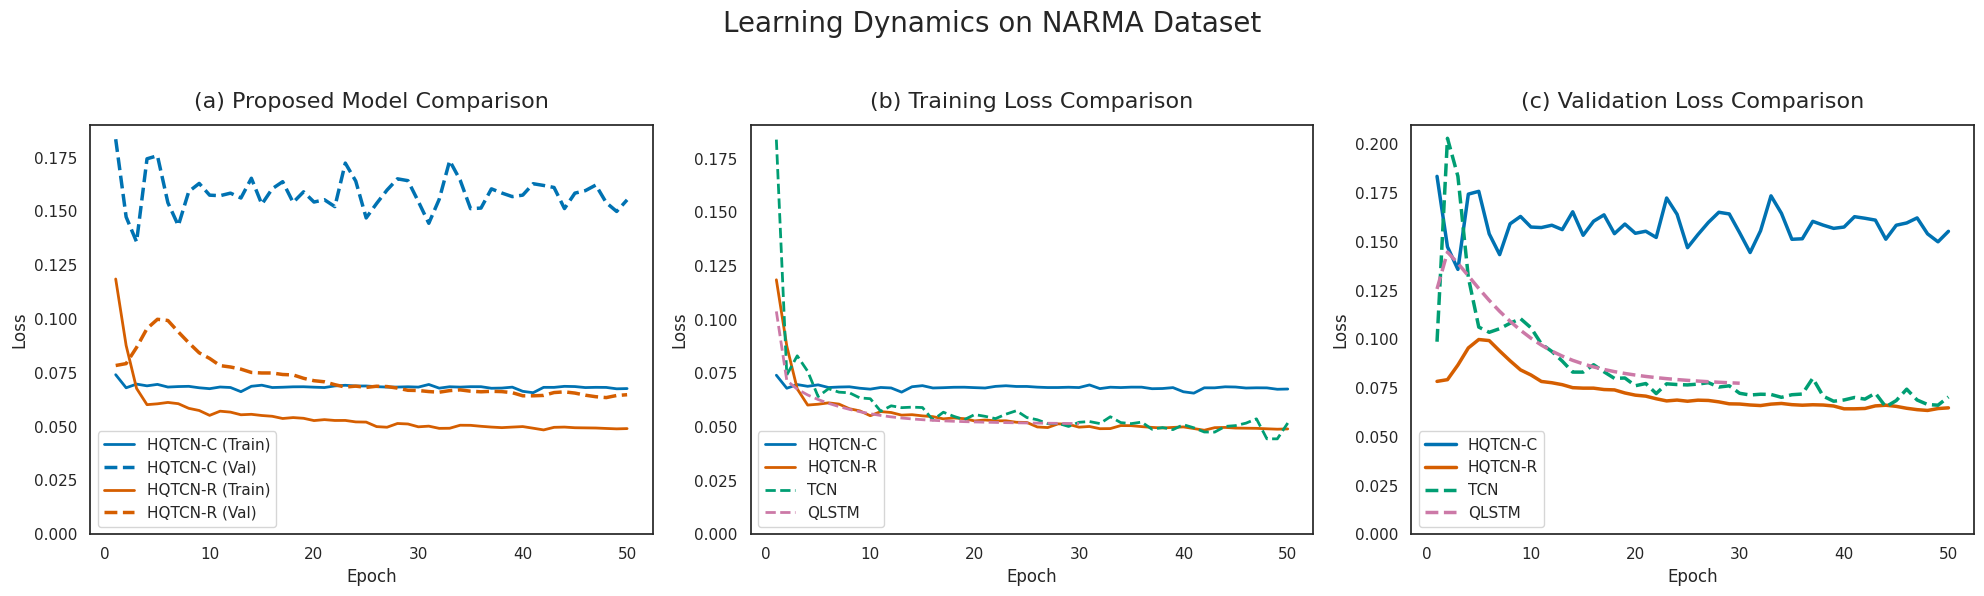

Figure saved successfully to: /pscratch/sd/p/pakmasha/QTCN/visualization/figure_2.svg


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Configuration ---
CSV_FILE_PATH = '/pscratch/sd/p/pakmasha/QTCN/visualization/narma_logs.csv'
# Define the output path and filename
SAVE_DIR = '/pscratch/sd/p/pakmasha/QTCN/visualization'
FIGURE_NAME = 'figure_2.svg' # Using SVG for highest quality vector graphics
SAVE_PATH = os.path.join(SAVE_DIR, FIGURE_NAME)


# Define a professional color palette
colors = {
    'qtcn1': '#0072B2',  # Blue
    'qtcn2': '#D55E00',  # Vermillion
    'tcn': '#009E73',   # Green
    'qlstm': '#CC79A7', # Reddish Purple
}

# Define line styles
styles = {
    'train': '-',  # Solid
    'val': '--',   # Dashed
}

# --- 2. Data Loading ---
try:
    df = pd.read_csv(CSV_FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file '{CSV_FILE_PATH}' was not found.")
    exit()

# --- 3. Plotting ---
sns.set_theme(style="white")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Use a slightly lower 'y' value to bring the title closer to the plots
fig.suptitle('Learning Dynamics on NARMA Dataset', fontsize=20, y=0.99)

# --- Panel A: Proposed Models (Train & Val Loss) ---
ax1.plot(df['epoch'], df['qtcn1_train_loss'], label='HQTCN-C (Train)', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2)
ax1.plot(df['epoch'], df['qtcn1_val_loss'], label='HQTCN-C (Val)', color=colors['qtcn1'], linestyle=styles['val'], linewidth=2.5)
ax1.plot(df['epoch'], df['qtcn2_train_loss'], label='HQTCN-R (Train)', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2)
ax1.plot(df['epoch'], df['qtcn2_val_loss'], label='HQTCN-R (Val)', color=colors['qtcn2'], linestyle=styles['val'], linewidth=2.5)

ax1.set_title('(a) Proposed Model Comparison', fontsize=16, pad=12)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12) # Changed Y-axis label
# ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='lower left') # Fixed legend to bottom left
ax1.set_ylim(bottom=0)

# --- Panel B: All Models (Training Loss) ---
ax2.plot(df['epoch'], df['qtcn1_train_loss'], label='HQTCN-C', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2)
ax2.plot(df['epoch'], df['qtcn2_train_loss'], label='HQTCN-R', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2)
ax2.plot(df['epoch'], df['tcn_train_loss'], label='TCN', color=colors['tcn'], linestyle=styles['val'], linewidth=2)
ax2.plot(df['epoch'], df['qlstm_train_loss'], label='QLSTM', color=colors['qlstm'], linestyle=styles['val'], linewidth=2)

ax2.set_title('(b) Training Loss Comparison', fontsize=16, pad=12)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12) # Changed Y-axis label
# ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='lower left') # Fixed legend to bottom left
ax2.set_ylim(bottom=0)

# --- Panel C: All Models (Validation Loss) ---
ax3.plot(df['epoch'], df['qtcn1_val_loss'], label='HQTCN-C', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2.5)
ax3.plot(df['epoch'], df['qtcn2_val_loss'], label='HQTCN-R', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2.5)
ax3.plot(df['epoch'], df['tcn_val_loss'], label='TCN', color=colors['tcn'], linestyle=styles['val'], linewidth=2.5)
ax3.plot(df['epoch'], df['qlstm_val_loss'], label='QLSTM', color=colors['qlstm'], linestyle=styles['val'], linewidth=2.5)

ax3.set_title('(c) Validation Loss Comparison', fontsize=16, pad=12)
ax3.set_xlabel('Epoch', fontsize=12)
ax3.set_ylabel('Loss', fontsize=12) # Changed Y-axis label
# ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.legend(loc='lower left') # Fixed legend to bottom left
ax3.set_ylim(bottom=0)

# --- 4. Final Touches and Saving ---
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap

# Ensure the save directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

# Save the figure in high quality
# Using SVG format for best quality (vector graphics)
# Use bbox_inches='tight' to prevent labels from being cut off
plt.savefig(SAVE_PATH, bbox_inches='tight')

plt.show() # You can still display the plot in the notebook after saving

print(f"Figure saved successfully to: {SAVE_PATH}")

# Figure 3

### (sampling frequency = 80)

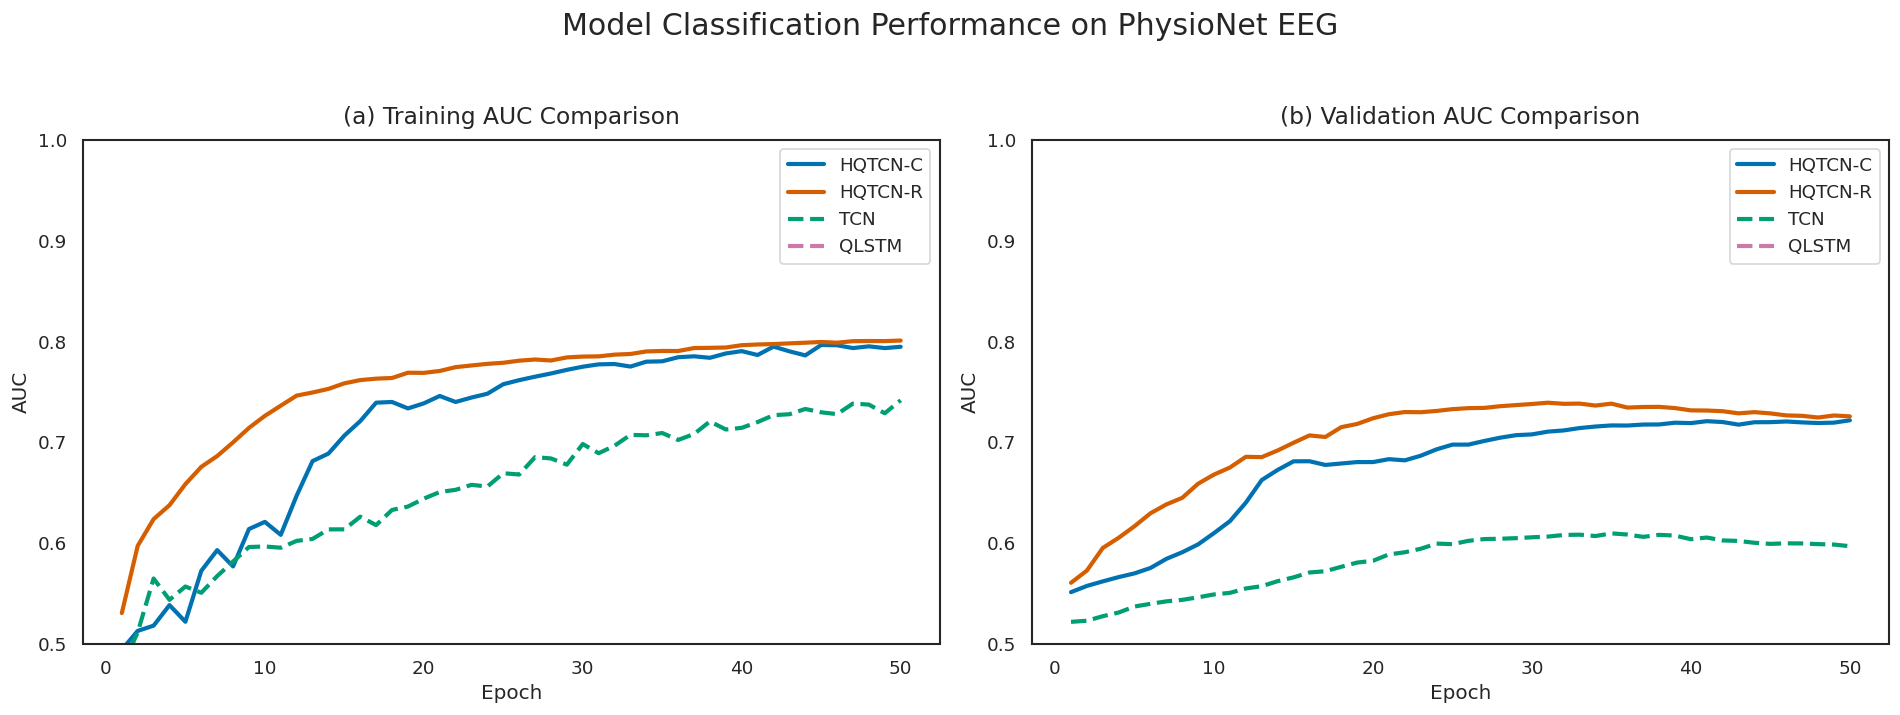

Figure saved successfully to: /pscratch/sd/p/pakmasha/QTCN/visualization/figure_3.svg


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Configuration ---
CSV_FILE_PATH = '/pscratch/sd/p/pakmasha/QTCN/visualization/physionet_logs.csv'
# Define the output path and filename
SAVE_DIR = '/pscratch/sd/p/pakmasha/QTCN/visualization'
FIGURE_NAME = 'figure_3.svg' # Using SVG for highest quality
SAVE_PATH = os.path.join(SAVE_DIR, FIGURE_NAME)

# Define the same color palette as previous figures
colors = {
    'qtcn1': '#0072B2',      # Blue
    'qtcn2': '#D55E00',      # Vermillion
    'tcn': '#009E73',       # Green
    'qlstm': '#CC79A7',     # Reddish Purple
}

# --- 2. Data Loading ---
try:
    df = pd.read_csv(CSV_FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file '{CSV_FILE_PATH}' was not found.")
    print("Please make sure the CSV file is in the correct location.")
    exit()

# --- 3. Plotting ---
sns.set_theme(style="white")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=120)

# Set the main title for the figure
fig.suptitle('Model Classification Performance on PhysioNet EEG', fontsize=18, y=0.99)

# --- Panel (a): Training AUC Comparison ---
ax1.plot(df['epoch'], df['qtcn1_train_auc'], label='HQTCN-C', color=colors['qtcn1'], linewidth=2.5)
ax1.plot(df['epoch'], df['qtcn2_train_auc'], label='HQTCN-R', color=colors['qtcn2'], linewidth=2.5)
ax1.plot(df['epoch'], df['tcn_train_auc'], label='TCN', color=colors['tcn'], linewidth=2.5, linestyle='--')
ax1.plot(df['epoch'], df['qlstm_train_auc'], label='QLSTM', color=colors['qlstm'], linewidth=2.5, linestyle='--')

ax1.set_title('(a) Training AUC Comparison', fontsize=14, pad=10)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('AUC', fontsize=12)
ax1.legend()
ax1.set_ylim(0.5, 1.0) # AUC ranges from 0 to 1, 0.5 is random chance

# --- Panel (b): Validation AUC Comparison ---
ax2.plot(df['epoch'], df['qtcn1_val_auc'], label='HQTCN-C', color=colors['qtcn1'], linewidth=2.5)
ax2.plot(df['epoch'], df['qtcn2_val_auc'], label='HQTCN-R', color=colors['qtcn2'], linewidth=2.5)
ax2.plot(df['epoch'], df['tcn_val_auc'], label='TCN', color=colors['tcn'], linewidth=2.5, linestyle='--')
ax2.plot(df['epoch'], df['qlstm_val_auc'], label='QLSTM', color=colors['qlstm'], linewidth=2.5, linestyle='--')

ax2.set_title('(b) Validation AUC Comparison', fontsize=14, pad=10)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('AUC', fontsize=12)
ax2.legend()
ax2.set_ylim(0.5, 1.0) # AUC ranges from 0 to 1, 0.5 is random chance

# --- 4. Final Touches and Saving ---
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Ensure the save directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

# Save the figure in high quality
plt.savefig(SAVE_PATH, bbox_inches='tight')

plt.show()

print(f"Figure saved successfully to: {SAVE_PATH}")

### (sampling frequency = 4)

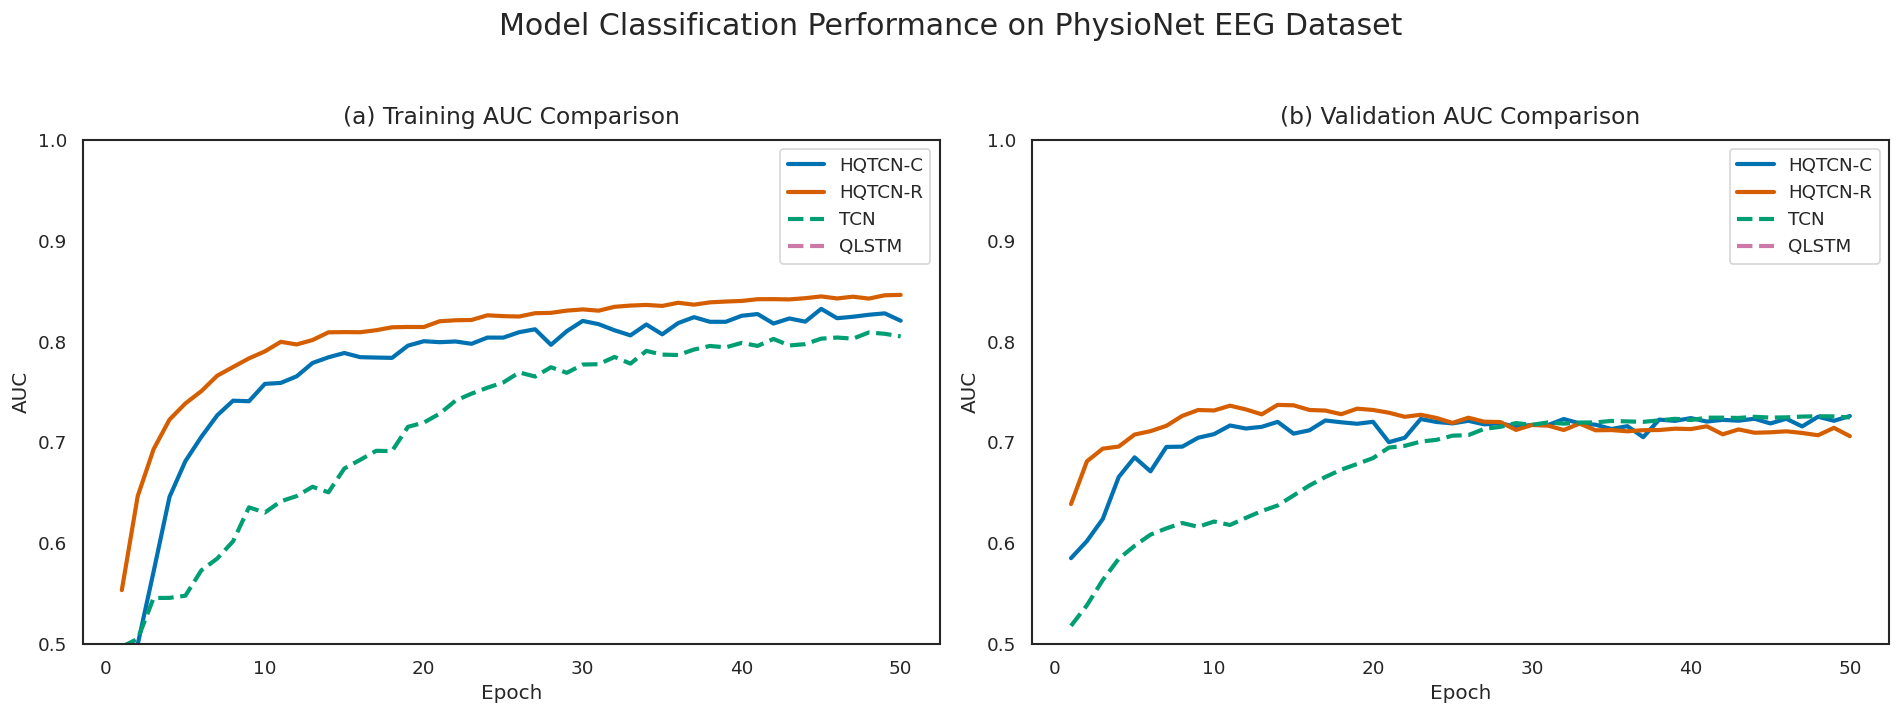

Figure saved successfully to: /pscratch/sd/p/pakmasha/QTCN/visualization/figure_3_samfreq=4.svg


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Configuration ---
CSV_FILE_PATH = '/pscratch/sd/p/pakmasha/QTCN/visualization/physionet_logs_samfreq=4.csv'
# Define the output path and filename
SAVE_DIR = '/pscratch/sd/p/pakmasha/QTCN/visualization'
FIGURE_NAME = 'figure_3_samfreq=4.svg' # Using SVG for highest quality
SAVE_PATH = os.path.join(SAVE_DIR, FIGURE_NAME)

# Define the same color palette as previous figures
colors = {
    'qtcn1': '#0072B2',      # Blue
    'qtcn2': '#D55E00',      # Vermillion
    'tcn': '#009E73',       # Green
    'qlstm': '#CC79A7',     # Reddish Purple
}

# --- 2. Data Loading ---
try:
    df = pd.read_csv(CSV_FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file '{CSV_FILE_PATH}' was not found.")
    print("Please make sure the CSV file is in the correct location.")
    exit()

# --- 3. Plotting ---
sns.set_theme(style="white")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=120)

# Set the main title for the figure
fig.suptitle('Model Classification Performance on PhysioNet EEG Dataset', fontsize=18, y=0.99)

# --- Panel (a): Training AUC Comparison ---
ax1.plot(df['epoch'], df['qtcn1_train_auc'], label='HQTCN-C', color=colors['qtcn1'], linewidth=2.5)
ax1.plot(df['epoch'], df['qtcn2_train_auc'], label='HQTCN-R', color=colors['qtcn2'], linewidth=2.5)
ax1.plot(df['epoch'], df['tcn_train_auc'], label='TCN', color=colors['tcn'], linewidth=2.5, linestyle='--')
ax1.plot(df['epoch'], df['qlstm_train_auc'], label='QLSTM', color=colors['qlstm'], linewidth=2.5, linestyle='--')

ax1.set_title('(a) Training AUC Comparison', fontsize=14, pad=10)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('AUC', fontsize=12)
ax1.legend()
ax1.set_ylim(0.5, 1.0) # AUC ranges from 0 to 1, 0.5 is random chance

# --- Panel (b): Validation AUC Comparison ---
ax2.plot(df['epoch'], df['qtcn1_train_auc'], label='HQTCN-C', color=colors['qtcn1'], linewidth=2.5)
ax2.plot(df['epoch'], df['qtcn2_train_auc'], label='HQTCN-R', color=colors['qtcn2'], linewidth=2.5)
ax2.plot(df['epoch'], df['tcn_train_auc'], label='TCN', color=colors['tcn'], linewidth=2.5, linestyle='--')
ax2.plot(df['epoch'], df['qlstm_train_auc'], label='QLSTM', color=colors['qlstm'], linewidth=2.5, linestyle='--')

ax2.set_title('(b) Validation AUC Comparison', fontsize=14, pad=10)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('AUC', fontsize=12)
ax2.legend()
ax2.set_ylim(0.5, 1.0) # AUC ranges from 0 to 1, 0.5 is random chance

# --- 4. Final Touches and Saving ---
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Ensure the save directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

# Save the figure in high quality
plt.savefig(SAVE_PATH, bbox_inches='tight')

plt.show()

print(f"Figure saved successfully to: {SAVE_PATH}")

# Figure 4

### (sampling frequency = 80)

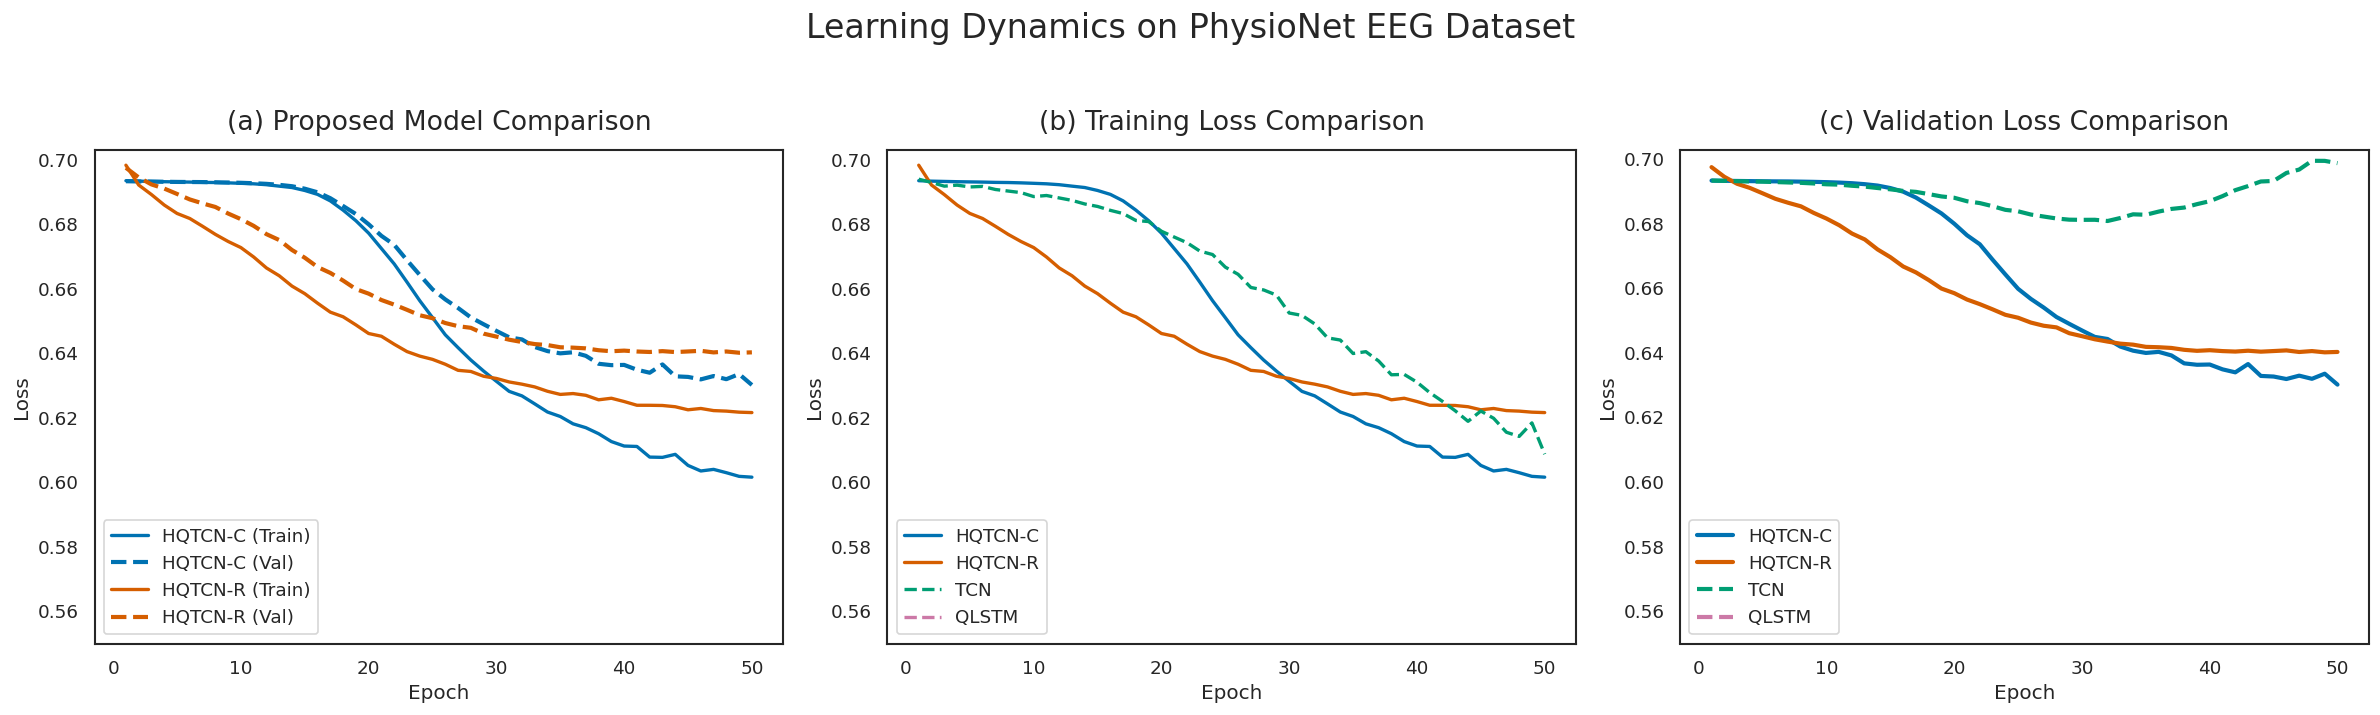

Figure saved successfully to: /pscratch/sd/p/pakmasha/QTCN/visualization/figure_4.svg


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Configuration ---
CSV_FILE_PATH = '/pscratch/sd/p/pakmasha/QTCN/visualization/physionet_logs.csv'
# Define the output path and filename
SAVE_DIR = '/pscratch/sd/p/pakmasha/QTCN/visualization'
FIGURE_NAME = 'figure_4.svg' # Using SVG for highest quality
SAVE_PATH = os.path.join(SAVE_DIR, FIGURE_NAME)

# Define a professional color palette for consistency
colors = {
    'qtcn1': '#0072B2',  # Blue
    'qtcn2': '#D55E00',  # Vermillion
    'tcn': '#009E73',   # Green
    'qlstm': '#CC79A7', # Reddish Purple
}

# Define line styles for training and validation loss
styles = {
    'train': '-',  # Solid line
    'val': '--',   # Dashed line
}

# --- 2. Data Loading ---
try:
    df = pd.read_csv(CSV_FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file '{CSV_FILE_PATH}' was not found.")
    print("Please double-check the path and ensure the file exists.")
    exit()

# --- 3. Plotting ---
sns.set_theme(style="white")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), dpi=120)

# Set the main title for the figure
fig.suptitle('Learning Dynamics on PhysioNet EEG Dataset', fontsize=20, y=0.99)

# --- Panel A: Proposed Models (Train & Val Loss) ---
ax1.plot(df['epoch'], df['qtcn1_train_loss'], label='HQTCN-C (Train)', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2)
ax1.plot(df['epoch'], df['qtcn1_val_loss'], label='HQTCN-C (Val)', color=colors['qtcn1'], linestyle=styles['val'], linewidth=2.5)
ax1.plot(df['epoch'], df['qtcn2_train_loss'], label='HQTCN-R (Train)', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2)
ax1.plot(df['epoch'], df['qtcn2_val_loss'], label='HQTCN-R (Val)', color=colors['qtcn2'], linestyle=styles['val'], linewidth=2.5)

ax1.set_title('(a) Proposed Model Comparison', fontsize=16, pad=12)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
# ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='lower left')
ax1.set_ylim(bottom=0.55)

# --- Panel B: All Models (Training Loss) ---
ax2.plot(df['epoch'], df['qtcn1_train_loss'], label='HQTCN-C', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2)
ax2.plot(df['epoch'], df['qtcn2_train_loss'], label='HQTCN-R', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2)
ax2.plot(df['epoch'], df['tcn_train_loss'], label='TCN', color=colors['tcn'], linestyle=styles['val'], linewidth=2)
ax2.plot(df['epoch'], df['qlstm_train_loss'], label='QLSTM', color=colors['qlstm'], linestyle=styles['val'], linewidth=2)

ax2.set_title('(b) Training Loss Comparison', fontsize=16, pad=12)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
# ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='lower left')
ax2.set_ylim(bottom=0.55)

# --- Panel C: All Models (Validation Loss) ---
ax3.plot(df['epoch'], df['qtcn1_val_loss'], label='HQTCN-C', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2.5)
ax3.plot(df['epoch'], df['qtcn2_val_loss'], label='HQTCN-R', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2.5)
ax3.plot(df['epoch'], df['tcn_val_loss'], label='TCN', color=colors['tcn'], linestyle=styles['val'], linewidth=2.5)
ax3.plot(df['epoch'], df['qlstm_val_loss'], label='QLSTM', color=colors['qlstm'], linestyle=styles['val'], linewidth=2.5)

ax3.set_title('(c) Validation Loss Comparison', fontsize=16, pad=12)
ax3.set_xlabel('Epoch', fontsize=12)
ax3.set_ylabel('Loss', fontsize=12)
# ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.legend(loc='lower left')
ax3.set_ylim(bottom=0.55)

# --- 4. Final Touches and Saving ---
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap

# Ensure the save directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

# Save the figure in high quality
plt.savefig(SAVE_PATH, bbox_inches='tight')

plt.show()

print(f"Figure saved successfully to: {SAVE_PATH}")

### (sampling frequency = 4)

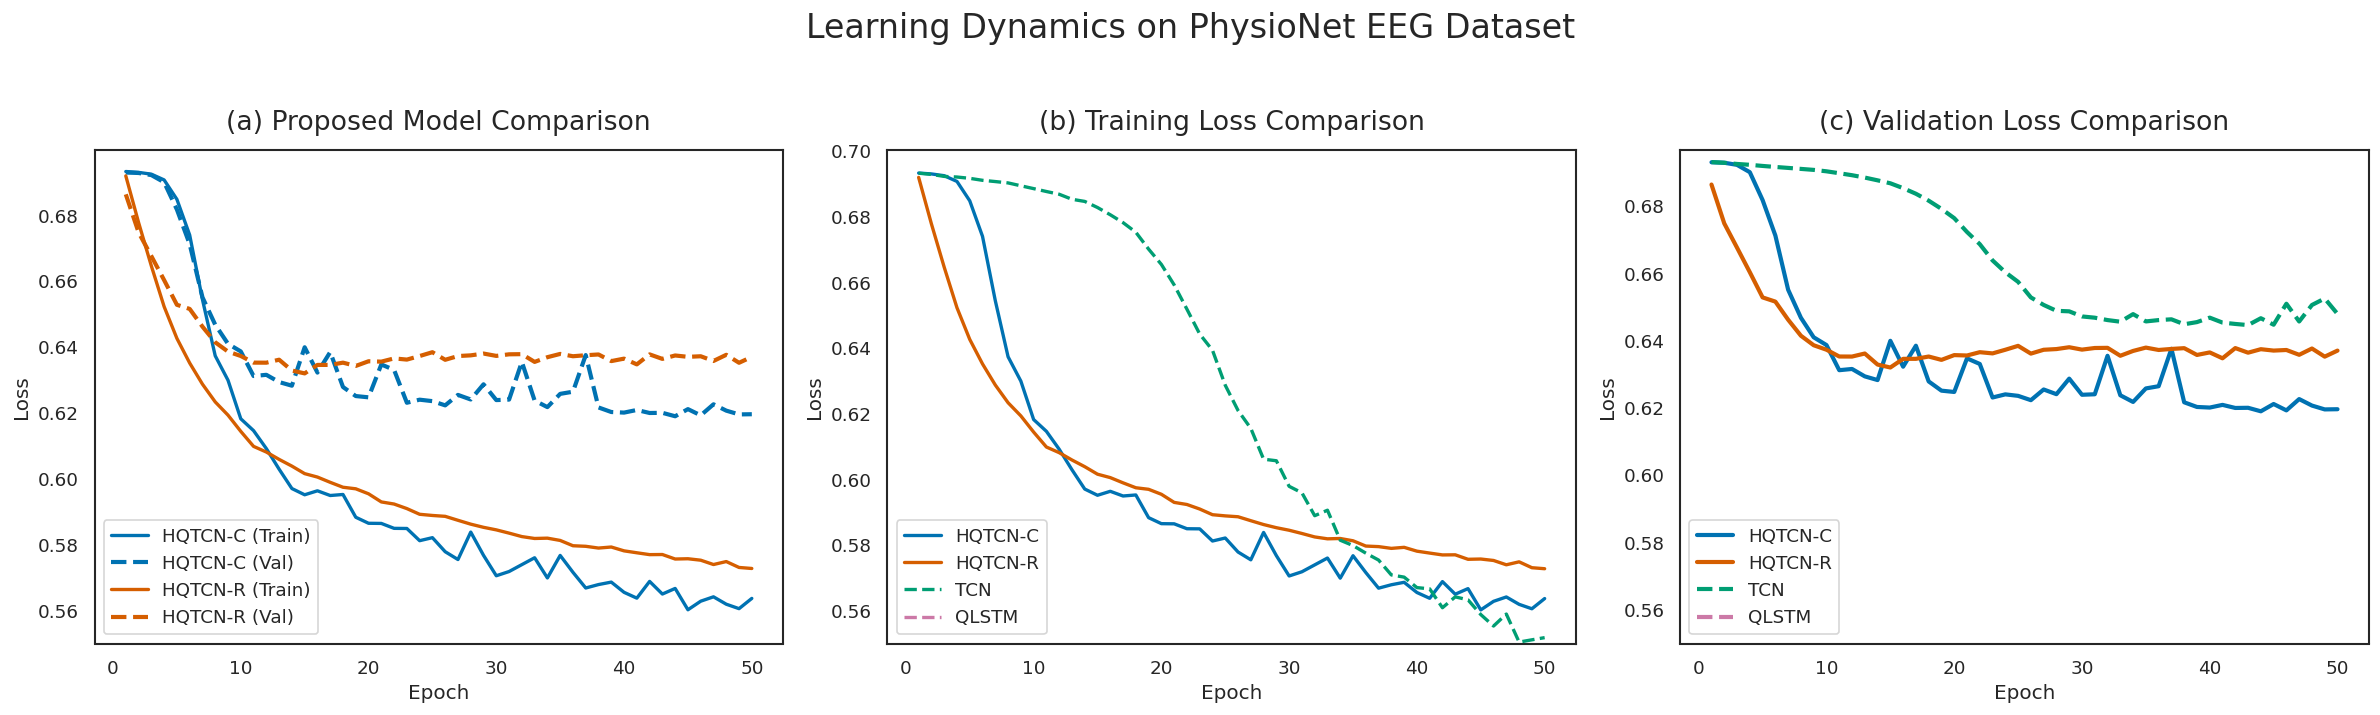

Figure saved successfully to: /pscratch/sd/p/pakmasha/QTCN/visualization/figure_4_samfreq=4.svg


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Configuration ---
CSV_FILE_PATH = '/pscratch/sd/p/pakmasha/QTCN/visualization/physionet_logs_samfreq=4.csv'
# Define the output path and filename
SAVE_DIR = '/pscratch/sd/p/pakmasha/QTCN/visualization'
FIGURE_NAME = 'figure_4_samfreq=4.svg' # Using SVG for highest quality
SAVE_PATH = os.path.join(SAVE_DIR, FIGURE_NAME)

# Define a professional color palette for consistency
colors = {
    'qtcn1': '#0072B2',  # Blue
    'qtcn2': '#D55E00',  # Vermillion
    'tcn': '#009E73',   # Green
    'qlstm': '#CC79A7', # Reddish Purple
}

# Define line styles for training and validation loss
styles = {
    'train': '-',  # Solid line
    'val': '--',   # Dashed line
}

# --- 2. Data Loading ---
try:
    df = pd.read_csv(CSV_FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file '{CSV_FILE_PATH}' was not found.")
    print("Please double-check the path and ensure the file exists.")
    exit()

# --- 3. Plotting ---
sns.set_theme(style="white")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), dpi=120)

# Set the main title for the figure
fig.suptitle('Learning Dynamics on PhysioNet EEG Dataset', fontsize=20, y=0.99)

# --- Panel A: Proposed Models (Train & Val Loss) ---
ax1.plot(df['epoch'], df['qtcn1_train_loss'], label='HQTCN-C (Train)', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2)
ax1.plot(df['epoch'], df['qtcn1_val_loss'], label='HQTCN-C (Val)', color=colors['qtcn1'], linestyle=styles['val'], linewidth=2.5)
ax1.plot(df['epoch'], df['qtcn2_train_loss'], label='HQTCN-R (Train)', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2)
ax1.plot(df['epoch'], df['qtcn2_val_loss'], label='HQTCN-R (Val)', color=colors['qtcn2'], linestyle=styles['val'], linewidth=2.5)

ax1.set_title('(a) Proposed Model Comparison', fontsize=16, pad=12)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
# ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='lower left')
ax1.set_ylim(bottom=0.55)

# --- Panel B: All Models (Training Loss) ---
ax2.plot(df['epoch'], df['qtcn1_train_loss'], label='HQTCN-C', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2)
ax2.plot(df['epoch'], df['qtcn2_train_loss'], label='HQTCN-R', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2)
ax2.plot(df['epoch'], df['tcn_train_loss'], label='TCN', color=colors['tcn'], linestyle=styles['val'], linewidth=2)
ax2.plot(df['epoch'], df['qlstm_train_loss'], label='QLSTM', color=colors['qlstm'], linestyle=styles['val'], linewidth=2)

ax2.set_title('(b) Training Loss Comparison', fontsize=16, pad=12)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
# ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='lower left')
ax2.set_ylim(bottom=0.55)

# --- Panel C: All Models (Validation Loss) ---
ax3.plot(df['epoch'], df['qtcn1_val_loss'], label='HQTCN-C', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2.5)
ax3.plot(df['epoch'], df['qtcn2_val_loss'], label='HQTCN-R', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2.5)
ax3.plot(df['epoch'], df['tcn_val_loss'], label='TCN', color=colors['tcn'], linestyle=styles['val'], linewidth=2.5)
ax3.plot(df['epoch'], df['qlstm_val_loss'], label='QLSTM', color=colors['qlstm'], linestyle=styles['val'], linewidth=2.5)

ax3.set_title('(c) Validation Loss Comparison', fontsize=16, pad=12)
ax3.set_xlabel('Epoch', fontsize=12)
ax3.set_ylabel('Loss', fontsize=12)
# ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.legend(loc='lower left')
ax3.set_ylim(bottom=0.55)

# --- 4. Final Touches and Saving ---
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap

# Ensure the save directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

# Save the figure in high quality
plt.savefig(SAVE_PATH, bbox_inches='tight')

plt.show()

print(f"Figure saved successfully to: {SAVE_PATH}")